
# Superstore Sales — Data Cleaning & Preparation

**Author:** Roy Lahav
**Dataset:** superstore_clean

## Objective
Perform fundamental **data cleaning** steps to prepare the Superstore dataset for analysis.  
This notebook is the first stage of the portfolio workflow, ensuring data integrity before EDA, segmentation, or modeling.

## Key Tasks
1. Load and inspect raw data.  
2. Handle duplicates, missing values, and incorrect data types.  
3. Standardize categories and create new fields for downstream use.  
4. Output a cleaned dataset for subsequent notebooks.

## Tools
- Python: `pandas`, `numpy`, `matplotlib`


## 1) Setup & Data Loading

In [1]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 120)

DATA_PATH = '/Users/roylahav/Code/Superstore_cleaned.csv'

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Dataset not found at {DATA_PATH}. Please add it under the data/ folder.")

# Load dataset
df = pd.read_csv(DATA_PATH)

print('Raw dataset shape:', df.shape)
df.head()


Raw dataset shape: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 2) Inspect Structure and Data Types

In [2]:

df.info()
df.describe(include='all').T.head(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Row ID,9994.0,NaN,NaN,NaN,4997.5,2885.163629,1.0,2499.25,4997.5,7495.75,9994.0
Order ID,9994,5009,CA-2017-100111,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,9994,1237,09/05/2016,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Date,9994,1334,12/16/2015,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Mode,9994,4,Standard Class,5968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,9994,793,WB-21850,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,9994,793,William Brown,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,9994,3,Consumer,5191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,9994,1,United States,9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9994,531,New York City,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN



**Comment:**  
Identify column types, check if numeric values are stored as strings, and review unique category values.


## 3) Handle Duplicates & Missing Values

In [3]:

# Count duplicates
dup_count = df.duplicated().sum()
print(f'Duplicates before cleaning: {dup_count}')

# Remove duplicates
df.drop_duplicates(inplace=True)
print(f'Duplicates after cleaning: {df.duplicated().sum()}')

# Check for missing values
missing = df.isnull().sum()
missing[missing > 0]


Duplicates before cleaning: 0
Duplicates after cleaning: 0


Series([], dtype: int64)


If minor missing values appear (e.g., in Postal Code or Ship Mode), they can often be left as-is.  
If critical fields (like Sales or Profit) are missing, drop or impute them depending on context.


## 4) Convert Data Types

In [4]:

# Convert date columns
for c in ['Order Date', 'Ship Date']:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors='coerce')

# Convert categorical columns
cat_cols = df.select_dtypes('object').columns
for c in cat_cols:
    df[c] = df[c].astype('category')

print('Data types after conversion:')
df.dtypes.head(10)


Data types after conversion:


Row ID                    int64
Order ID               category
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode              category
Customer ID            category
Customer Name          category
Segment                category
Country                category
City                   category
dtype: object

## 5) Standardize Text Fields for Consistency

In [5]:

# Example: unify text capitalization in selected columns
for c in ['Category', 'Region', 'Segment', 'Ship Mode']:
    if c in df.columns:
        df[c] = df[c].str.strip().str.title()

# Check unique categories
for c in ['Category','Region','Segment','Ship Mode']:
    if c in df.columns:
        print(f"\n{c}: {df[c].unique()}")



Category: ['Furniture' 'Office Supplies' 'Technology']

Region: ['South' 'West' 'Central' 'East']

Segment: ['Consumer' 'Corporate' 'Home Office']

Ship Mode: ['Second Class' 'Standard Class' 'First Class' 'Same Day']


## 6) Handle Outliers

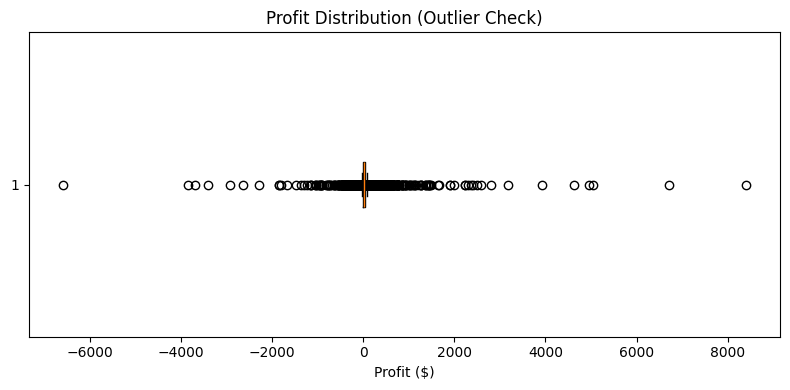

In [6]:

# Quick visual check for extreme values
if 'Profit' in df.columns:
    plt.figure(figsize=(8,4))
    plt.boxplot(df['Profit'], vert=False)
    plt.title('Profit Distribution (Outlier Check)')
    plt.xlabel('Profit ($)')
    plt.tight_layout()
    plt.show()


## 7) Basic Feature Engineering

In [7]:

# Adding a few useful derived features that may come in handy later
if 'Order Date' in df.columns and 'Ship Date' in df.columns:
    df['Ship_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

if 'Profit' in df.columns and 'Sales' in df.columns:
    df['Profit_Margin'] = np.where(df['Sales'] != 0, df['Profit'] / df['Sales'], 0)

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship_Days,Profit_Margin
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,0.1600
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,0.3000
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,0.4700
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,-0.4000
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,0.1125


## 8) Validation Checks

In [8]:

print('Final shape:', df.shape)
print('\nMissing values:')
print(df.isnull().sum().sum())

print('\nDuplicate rows remaining:', df.duplicated().sum())

# Sanity check on date ranges
if 'Order Date' in df.columns:
    print('\nDate range:', df['Order Date'].min(), '→', df['Order Date'].max())


Final shape: (9994, 23)

Missing values:
0

Duplicate rows remaining: 0

Date range: 2014-01-03 00:00:00 → 2017-12-30 00:00:00



**Comment:**  
Ensure the cleaned dataset matches expectations and is ready for EDA, forecasting, and segmentation notebooks.


## 9) Export Cleaned Dataset

In [9]:

OUT_DIR = 'data_cleaned'
os.makedirs(OUT_DIR, exist_ok=True)
out_path = os.path.join(OUT_DIR, 'Superstore_Cleaned.csv')
df.to_csv(out_path, index=False)
print('Cleaned dataset saved to:', out_path)


Cleaned dataset saved to: data_cleaned/Superstore_Cleaned.csv
